# **Calibration of the Energy Deposit vs Incident Energy**

In [29]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

## Reading the files and the scoring tree

In [30]:
energy_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,5,10,20,40,50,60,70,80,100,200,300,400,500,600,700,800,900,1000]


file_list=[]
for i in energy_list:
    file_list.append(ROOT.TFile(f"..//Outputs//Calibration//{i}GeV.root","READ"))  
    
    
tree_list=[]

for i in range(len(energy_list)):
    tree_list.append(file_list[i].Get("Scoring"))
    

## Creating the histograms and fitting the data with landau

In [31]:
hist_list=[]
mpv_list=[]
mpv_error_list=[]


for i in range(len(energy_list)):
    curr_hist = ROOT.TH1F(f"EnergyDeposit_{energy_list[i]}GeV",f"Incident Energy = {energy_list[i]}GeV",400,0,30)
    
    for events in tree_list[i]:
        float; edep = events.fEdep
        curr_hist.Fill(edep)   
    curr_hist.Fit("landau","Q0")
    mpv = curr_hist.GetFunction("landau").GetParameter(1)
    mpv_list.append(mpv)
    mpv_error = curr_hist.GetFunction("landau").GetParError(1)
    mpv_error_list.append(mpv_error)
    hist_list.append(curr_hist)
    
    
print(energy_list)

print(mpv_list)    

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 5, 10, 20, 40, 50, 60, 70, 80, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
[9.759905897503428, 8.156075760799583, 7.757748208312416, 7.5986109805453825, 7.5158237789590805, 7.468615376336506, 7.44704203462174, 7.422549901900409, 7.437397222045797, 7.436710487890685, 7.426202921189991, 7.475508500857064, 7.4852554811672185, 7.516201156082883, 7.4980894329604535, 7.5088805324804415, 7.510174436319949, 7.528583515283616, 7.505794743954261, 7.52509899941012, 7.525352503045211, 7.534481823017324, 7.535487288772129, 7.538222219224765, 7.5212910140686065, 7.5400206441692, 7.529321301440428, 7.535802331386026, 7.53316988663199]


## Plotting the calibration curve

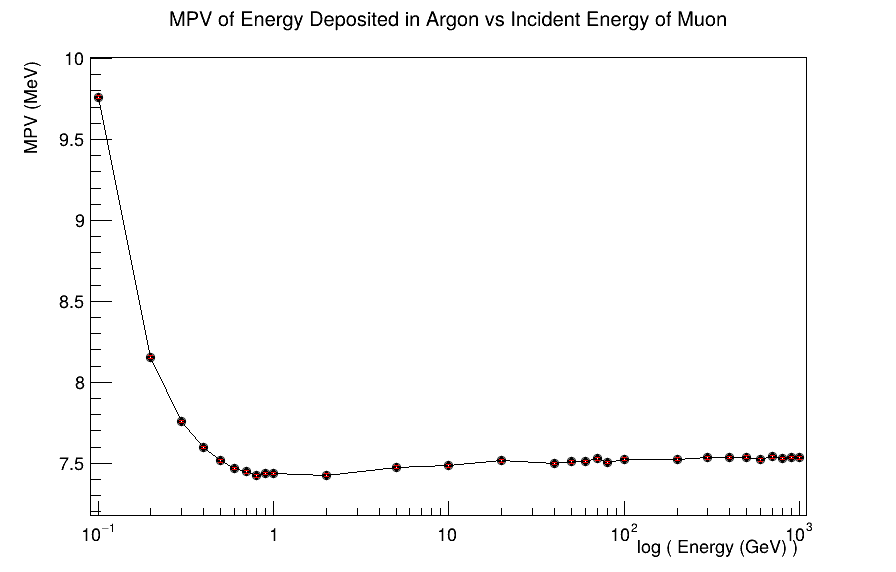

In [32]:
canvas = True
canvas = ROOT.TCanvas("canvas", "canvas", 900, 600)

graph = ROOT.TGraphErrors(len(energy_list), np.array(energy_list), np.array(mpv_list), np.zeros(len(energy_list)), np.array(mpv_error_list))
graph.SetMarkerStyle(20)
graph.SetMarkerSize(1)
graph.SetMarkerColor(1) 
graph.SetLineColor(1)    
graph.Draw("APL")


error_graph = ROOT.TGraphAsymmErrors(len(energy_list), np.array(energy_list), np.array(mpv_list), np.zeros(len(energy_list)), np.zeros(len(energy_list)), np.array(mpv_error_list), np.array(mpv_error_list))
error_graph.SetLineColor(2)  # Error bar color red
error_graph.SetFillColor(0)  # No fill color
error_graph.SetMarkerColor(0)  # No marker color
error_graph.Draw("P")
graph.SetTitle("MPV of Energy Deposited in Argon vs Incident Energy of Muon")
graph.GetXaxis().SetTitle("log ( Energy (GeV) )")
graph.GetYaxis().SetTitle("MPV (MeV)")
canvas.SetLogx()
# canvas.SetGrid()
canvas.Draw()



'''
Saving the file as a root file
'''
cal_res = ROOT.TFile("calibration_results.root","RECREATE")
graph.Write()
cal_res.Close()